<a href="https://colab.research.google.com/github/CarloGiorgio/carlogiorgio/blob/master/Thesis/Noise_and_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation


from numpy.random import rand,exponential

In [2]:
##Gillespie algorithm No cellular division

def gillespie(bm, am, bn, an, steps):
    t = 0
    m = 0
    n = 0
    M = [m] 
    N = [n] 
    T = [t]
    N_m=[m]
    M_m=[n]
    M_n=[m]
    N_n=[n]
    for i in range(steps):
        a1 = bm
        a2 = am*m
        a3 = bn*m
        a4 = an*n
        A = a1+a2+a3+a4
        t += exponential(1/A)
        r2 = rand()

        
        
        if r2 < a1/A:
            m = m+1
        elif r2<(a1+a2)/A:
            m=m-1
        elif r2<(a1+a2+a3)/A:
            n=n+1
        else:
            n=n-1
                
        T+=[t]
        M+=[m]
        N+=[n]
        if i >20:
            M_m.append(np.mean(M))
            N_m.append(np.mean(N))
            M_n.append(np.var(M))
            N_n.append(np.var(N))
    N=np.asarray(N)
    M=np.asarray(M)
    M_m=np.asarray(M_m)
    M_n=np.asarray(M_n)
    N_m=np.asarray(N_m)
    N_n=np.asarray(N_n)
    return M,N,M_n,N_n,T

In [4]:
am = 1/1.5
mbar = 0.037
bm = mbar*am
an = 1/60
bn = 2.67

In [5]:
steps=2000
M,N,M_n,N_n,T=gillespie(bm, am, bn, an, steps)

In [6]:
print('M mean',np.sum(M[:-1]*np.diff(T[:])/T[-1]))
print('N mean',np.sum(N[:-1]*np.diff(T[:])/T[-1]))
print('N noise',(np.sum(N[:-1]*N[:-1]*np.diff(T[:]))/T[-1]-(np.sum(N[:-1]*np.diff(T[:])/T[-1]))**2)/
      ((np.sum(N[:-1]*np.diff(T[:])/T[-1]))**2))
print('M noise',(np.sum(M[:-1]*M[:-1]*np.diff(T[:]))/T[-1]-(np.sum(M[:-1]*np.diff(T[:])/T[-1]))**2)/
      ((np.sum(M[:-1]*np.diff(T[:])/T[-1]))**2))

M mean 0.038294742568737015
N mean 5.8111041875703755
N noise 0.8190921954295358
M noise 26.44883627298379


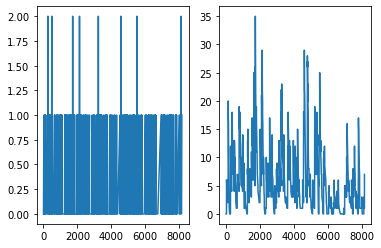

In [7]:
fig,axs=plt.subplots(1,2)
axs[0].plot(T,M)
axs[1].plot(T,N)

(array([318., 432., 459., 279., 242., 102.,  87.,  41.,  31.,  10.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <a list of 10 Patch objects>)

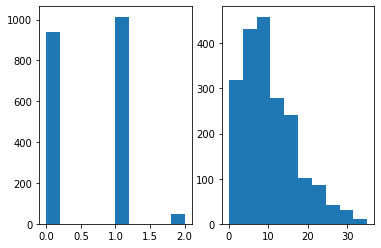

In [8]:
fig,axs=plt.subplots(1,2)
axs[0].hist(M)
axs[1].hist(N)

In [ ]:

fig, ax = plt.subplots()

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# histogram our data with numpy
data=N[:140]
n, bins = np.histogram(data, 15,density=True)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='blue', edgecolor='black', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())
ax.set_xlabel("Proteins'number")
ax.set_ylabel("Occurrences")

def animate(i):
    # simulate new data coming in
    data = N[:i*20]
    n, bins = np.histogram(data, 15,density=True)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    plt.title('T=%d i=%d'%(T[i*20],i*20))
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=False)
ani.save('hist.mp4',writer=writer)
plt.show()

In [36]:
def mean_time(M,T):
  return (np.sum(M[:-1]*np.diff(T[:]))/T[-1])

def noise(M,T):
  return (mean_time(M**2,T)-mean_time(M,T)**2)/(mean_time(M,T)**2)

In [38]:
def gillespie_noise(bm, am, bn, an, steps):
    t = 0
    m = 0
    n = 0 
    N = [] 
    T = []
    for i in range(steps):
        a1 = bm
        a2 = am*m
        a3 = bn*m
        a4 = an*n
        A = a1+a2+a3+a4
        t += exponential(1/A)
        r2 = rand()

        if r2 < a1/A:
            m = m+1
        elif r2<(a1+a2)/A:
            m=m-1
        elif r2<(a1+a2+a3)/A:
            n=n+1
        else:
            n=n-1
        if i>500:
          T+=[t]
          N+=[n]
        
    N=np.asarray(N)
    T=np.asarray(T)
    return mean_time(N,T),noise(N,T)

In [45]:
N_mean=np.zeros(100)
N_noise=np.zeros(100)
a=np.logspace(1,2,100)
for (i,f) in enumerate(a):
  N_mean[i],N_noise[i]=gillespie_noise(bm,am,bn*f,an*f,1000)

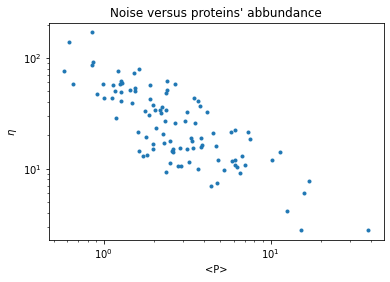

In [49]:
fig,ax=plt.subplots()
plt.loglog()
ax.plot(N_mean,N_noise,'.')
ax.set(xlabel='<P>',ylabel=r'$\eta$',title="Noise versus proteins' abbundance")
#fig.savefig('noise_abbundance.pdf')